In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [41]:
# Load the data into a pandas DataFrame
file_path=r'C:\Users\DELL\Documents\employees.csv'
df = pd.read_csv(file_path)
# Display the first few rows of the DataFrame


In [42]:
print(df.head())
# Check for missing values


  First Name  Gender Start Date Last Login Time  Salary  Bonus %  \
0    Douglas    Male   8/6/1993        12:42 PM   97308    6.945   
1     Thomas    Male  3/31/1996         6:53 AM   61933    4.170   
2      Maria  Female  4/23/1993        11:17 AM  130590   11.858   
3      Jerry    Male   3/4/2005         1:00 PM  138705    9.340   
4      Larry    Male  1/24/1998         4:47 PM  101004    1.389   

  Senior Management             Team  
0              True        Marketing  
1              True              NaN  
2             False          Finance  
3              True          Finance  
4              True  Client Services  


In [43]:
print(df.isnull().sum())


First Name            67
Gender               145
Start Date             0
Last Login Time        0
Salary                 0
Bonus %                0
Senior Management     67
Team                  43
dtype: int64


In [44]:
# Fill or drop missing values if necessary
df['Salary'].fillna(df['Salary'].mean(), inplace=True)
df.dropna(subset=['Start Date', 'Team', 'Senior Management'], inplace=True)
# Summary statistics
print(df.describe())


              Salary     Bonus %
count     899.000000  899.000000
mean    90479.672970   10.200201
std     32743.875488    5.551621
min     35013.000000    1.015000
25%     62412.500000    5.267000
50%     90730.000000    9.770000
75%    118107.500000   14.868500
max    149908.000000   19.944000


In [45]:
# Group by product and calculate the total sales and quantity
product_summary = df.groupby('Team').agg({
'Salary': 'sum',
'Bonus %': 'sum'
}).reset_index()
print(product_summary)


                   Team   Salary   Bonus %
0  Business Development  9047970  1063.070
1       Client Services  8844507  1040.999
2          Distribution  6674374   744.072
3           Engineering  8134038   884.777
4               Finance  8995144   985.420
5       Human Resources  7628864   861.522
6                 Legal  7723381   880.360
7             Marketing  8246883   957.333
8               Product  8069871   896.678
9                 Sales  7976194   855.750


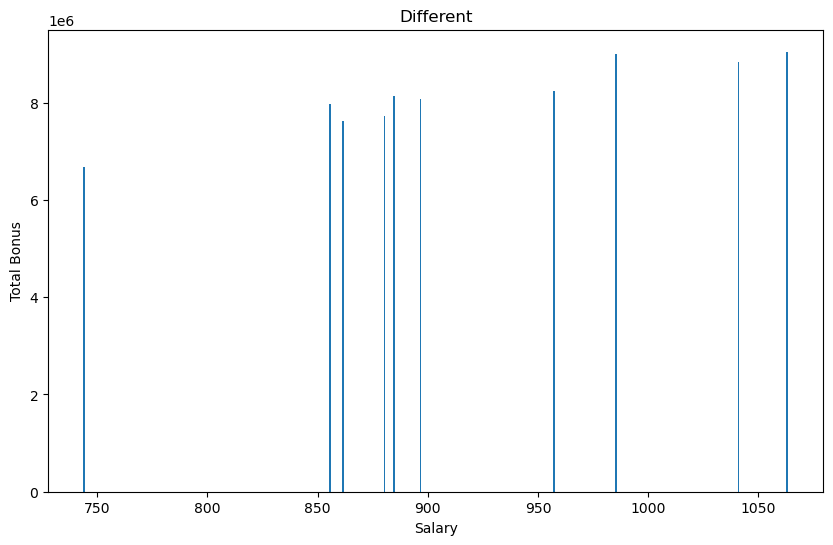

In [60]:
# Bar plot of total sales by product
plt.figure(figsize=(10, 6))
plt.bar(product_summary['Bonus %'], product_summary['Salary'])
plt.xlabel('Salary')
plt.ylabel('Total Bonus')
plt.title('Different')
plt.show()


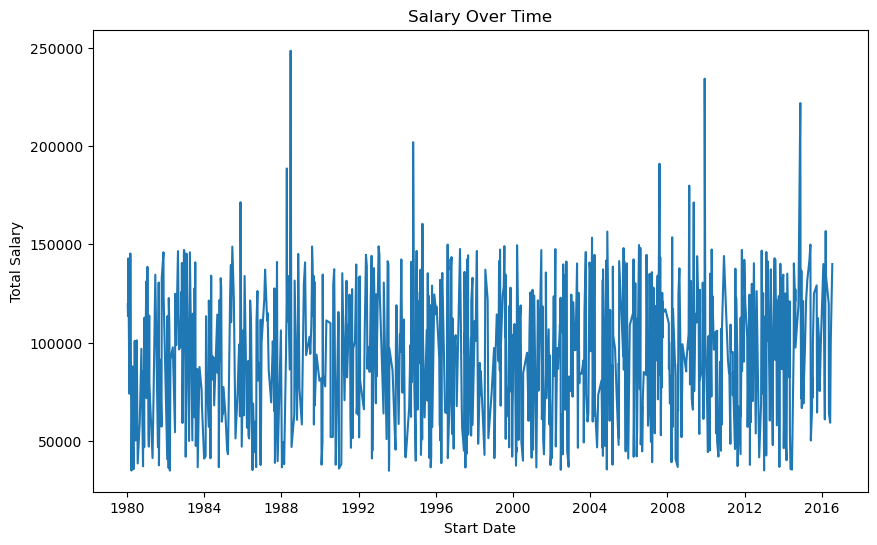

In [62]:
# Line plot of sales over time
df['Start Date'] = pd.to_datetime(df['Start Date'])
sales_over_time = df.groupby('Start Date').agg({'Salary': 'sum'}).reset_index()
plt.figure(figsize=(10, 6))
plt.plot(sales_over_time['Start Date'], sales_over_time['Salary'])
plt.xlabel('Start Date')
plt.ylabel('Total Salary')
plt.title('Salary Over Time')
plt.show()


Gender                 Female     Male
Team                                  
Business Development  4539606  3426189
Client Services       4029908  3563708
Distribution          2474177  2676769
Engineering           3857450  3597733
Finance               3926300  3635226
Human Resources       2964584  3962449
Legal                 3027725  2872724
Marketing             3496196  3220346
Product               3798683  3417002
Sales                 3151947  3452240
          Salary  Bonus %
Salary   1.00000 -0.01702
Bonus % -0.01702  1.00000


C:\Users\DELL\AppData\Local\Temp\ipykernel_15768\3170005311.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


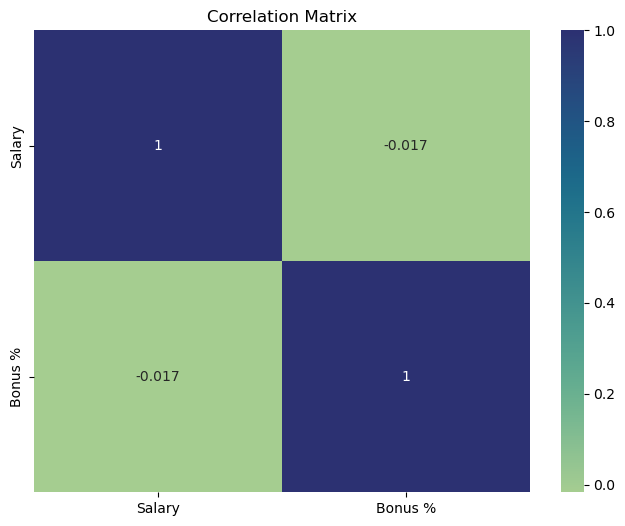

In [64]:
# Pivot table to analyze sales by region and product
pivot_table = df.pivot_table(values='Salary', index='Team', columns='Gender',
aggfunc=np.sum, fill_value=0)
print(pivot_table)
# Correlation matrix
correlation_matrix = df.corr()
print(correlation_matrix)
# Heatmap of the correlation matrix
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='crest')
plt.title('Correlation Matrix')
plt.show()